# Выявление закономерностей, определяющих успешность игр

## План исследования
Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игр.

## Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (в миллионах проданных копий)
- EU_sales — продажи в Европе (в миллионах проданных копий)
- JP_sales — продажи в Японии (в миллионах проданных копий)
- Other_sales — продажи в других странах (в миллионах проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 
    
    Действующие рейтинги:

    - «EC» («Early childhood») — «Для детей младшего возраста.
    - «E» («Everyone») — «Для всех»
    - «E10+» («Everyone 10 and older») — «Для всех старше 10 лет.
    - «T» («Teen») — «Подросткам»
    - «M» («Mature») — «От 17 лет»
    - «AO» («Adults Only 18+») — «Только для взрослых»
    - «RP» («Rating Pending»») — «Рейтинг ожидается»
    - K-A устаревший рейтинг, данные игры имеют рейтинг "E" согласно информации в интернете


*Примечание:
Данные за 2016 год могут быть неполными.*

## Изучение данных

In [1]:
# загрузим все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

pd.set_option('display.max_columns', None)

In [2]:
# откроем файл с играми и изучим информацию
data = pd.read_csv('games.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Вывод**

Файл с данными состоит из 11 столбцов и 16715 строк. В названии столбцов видны заглавные буквы, которые необходимо привести к нижнему регистру. Так же в данных имеются пропуски, основная доля которых приходится на рейтинг, оценку критиков и оценку пользователей. Тип данных в столбце *user_score* необходимо изменить с object на float, поскольку данные представлены в виде оценки от 0 до 10. Столбец с годом реализа преобразуем в целочисленный тип, вместо вещественного.

## Подготовка данных

In [3]:
# приведём заголовки столбцов к нижнему регистру
data.columns = [x.lower() for x in data.columns]
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Наименования столбцов приведены к нижнему регистру. Проверим наличие полных дубликатов в данных.

In [4]:
# проверим данные на полные дубликаты
print('Кол-во дубликатов в данных:', data.duplicated().sum())

Кол-во дубликатов в данных: 0


Дубликатов в данных не обнаружено. Приступим к обработке пропусков.

In [5]:
# найдём количество и долю пропусков в каждом столбце
for column in data.columns:
    print('-' * 57)
    print("{:<16}{:<14}{:<5}{:<15}{:<6}{:<5}".format(column, '- кол-во NaN:', data[column].isna().sum(),
          '- процент NaN:', round(data[column].isna().sum() / len(data) * 100, 2), '%'))

---------------------------------------------------------
name            - кол-во NaN: 2    - процент NaN: 0.01  %    
---------------------------------------------------------
platform        - кол-во NaN: 0    - процент NaN: 0.0   %    
---------------------------------------------------------
year_of_release - кол-во NaN: 269  - процент NaN: 1.61  %    
---------------------------------------------------------
genre           - кол-во NaN: 2    - процент NaN: 0.01  %    
---------------------------------------------------------
na_sales        - кол-во NaN: 0    - процент NaN: 0.0   %    
---------------------------------------------------------
eu_sales        - кол-во NaN: 0    - процент NaN: 0.0   %    
---------------------------------------------------------
jp_sales        - кол-во NaN: 0    - процент NaN: 0.0   %    
---------------------------------------------------------
other_sales     - кол-во NaN: 0    - процент NaN: 0.0   %    
----------------------------------------

Учитывая то, что в столбцах с именем, жанром и годом выхода игр доля пропусков небольшая (максимум 1.61%), а заменить пропуски на соответствующие значения не представляется возможным, логичным решением будет их удалить. Причиной пропусков вероятнее всего является ошибка ввода данных.

In [6]:
# удалим пропуски в столбцах с именем, годом выпуска и жанром
data.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

In [7]:
# найдём уникальные значения в столбце year_of_release
print(data['year_of_release'].sort_values().unique())

[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.]


В данных присутствуют игры начиная с 1980 по 2016 год включительно, причём данные за 2016 год могут быть неполными, как следует из условия задачи. Преобразуем тип данных в столбце с годом релиза с типа float на int, поскольку дробных годов у нас нет. 

In [8]:
# преобразование типа данных с вещественного на целочисленный тип
data['year_of_release'] = data['year_of_release'].astype(int)

Осталось 3 столбца, в которых находится основная доля пропусков: "critic_score", "user_score", "rating". Причиной пропусков в столбцах с оценкой может являться технологический фактор. Так как игры выпускались с 1980 года, в то время вполне могло не быть единой системы оценок. Пропуски в столбце с рейтингом, вероятно, возникли из-за специфики самой организации, основное направление деятельности которой приходится на США и Канаду. Для того, чтобы не потерять данные при анализе, заполним пустые значения заглушкой "-1".

In [9]:
# заполним пропуски в рейтинге, оценке пользователей и критиков 
data.fillna({'user_score':-1, 'critic_score':-1, 'rating':'Empty'}, inplace=True)

Исправим в столбце *user_score* тип данных с object на float, так как данные представляют собой оценку в виде числовых значений от 0 до 10.

In [10]:
# найдём уникальные значения в столбце с пользовательской оценкой
data['user_score'].value_counts()

-1     6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.3       2
1.1       2
0.6       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

Теперь ясно, почему столбец *user_score* не является количественным типом: в данных присутствует текст. Значение 'tbd' может интерпретироваться с англ.языка как 'to be determined', что в переводе на русский - информация не определена, либо её только предстоит определить. Фактически, это отсутствие оценок пользователей, поэтому логичным решением будет заменить их числом, не входящим в диапазон значений столбца, например, отрицательной единицей "-1".

In [11]:
# заменим все строковые значения в столбце user_score на -1
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1

Данные в столбце с пользовательской оценкой исправлены и теперь можно изменить тип данных на корректный.

In [12]:
# изменим тип данных в user_score с object на float
data['user_score'] = pd.to_numeric(data['user_score'])
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Тип данных успешно изменён. В заключении данного раздела рассчитаем суммарное количество продаж по всем регионам для каждой игры и запишем их в отдельный столбец *total_sales*.

In [13]:
# добавим столбец total_sales для подсчёта общего количества проданных игр
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Empty,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Empty,31.38


Общие продажи для каждой игры посчитаны и на этом подготовка данных завершена. Проверим, что стало с исходным файлом по итогу предобработки.

In [14]:
# финальная проверка данных после предобработки
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


**Вывод**

В данном разделе были приведены к нижнему регистру названия столбцов и проверены данные на наличие полных дубликатов. В столбцах с именем, жанром и годом выпуска игр пропущенные значения удалены, а в столбцах с рейтингом, пользовательской оценкой и оценкой критиков заполнены отрицательной единицей (заглушкой). Ко всему прочему, в столбце с пользовательскими оценками значение 'tbd'(от англ. 'to be determined') также заменено на отрицальную единицу для того, чтобы присвоить столбцу числовой тип данных вместо строкового без потери смысла. В заключении раздела был добавлен еще один столбец total_sales, в котором отражается количество продаж (в млн.копий) по всем регионам для каждой игры. Общая потеря данных после предобработки составила 1.6%

## Исследовательский анализ данных

Первым делом посмотрим, какое количество игр выпускалось в разные годы. Для наглядности представим данные в виде гистограммы частот.

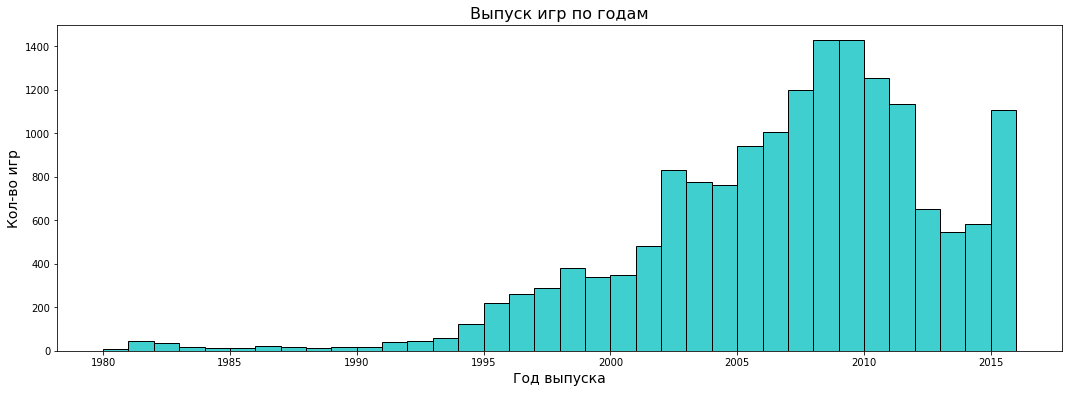

In [15]:
# построим гистограмму частот для кол-ва выпущенных игр в год
plt.figure(figsize=(18, 6))
sns.histplot(
    data,
    x = 'year_of_release',
    color = 'c',
    bins = 36)

plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Кол-во игр', fontsize=14)
plt.title('Выпуск игр по годам', fontsize=16)
plt.show()

Из гистограммы видно, что вплоть до 1995 года количество выпущенных игр в год не превышало 200 шт. После 1995 года началось бурное развитие игровой индустрии, достигнув максимальной отметки в 2009-2010 годах на уровне более 1400 выпущенных в год игр. После пикового значения наступил спад, который закончился в 2014 году с отметкой в ~580 игр в год и уже в 2016 году значение составило примерно 1100 шт, при том, что данные еще не окончательные.

In [16]:
# найдём платформы с наибольшими суммарными продажами
sales_per_platform = (
    data.groupby('platform', as_index = False)['total_sales'].sum()\
    .sort_values(by = 'total_sales', ascending = False)
)
sales_per_platform.head(5)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


Из сводной таблицы `sales_per_platform` выберем самые популярные платформы: PS2, X360, PS3, Wii, DS; и построим для каждой из них график с распределением продаж в разрезе лет.

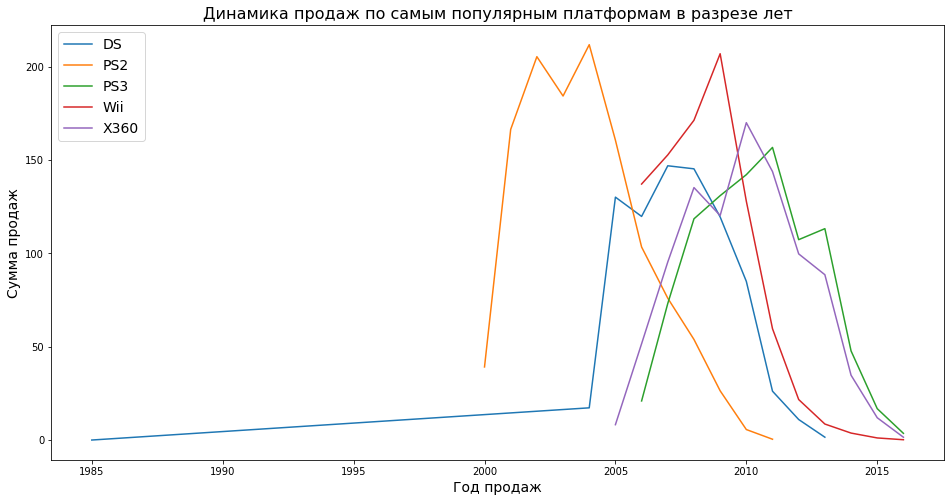

In [17]:
# передадим переменной список наиболее популярных платформ
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

# сделаем сводную таблицу по самым популярным платформам
most_popular_platform = (data
    .query('@platforms in platform')
    .pivot_table(
        index = ['platform', 'year_of_release'],  
        values = 'total_sales', 
        aggfunc = 'sum'
    ).reset_index()
)

# построим график зависимости суммы продаж по каждом году в каждой из популярных платформ
plt.figure(figsize = (16, 8))
sns.lineplot(
        data = most_popular_platform,
        x = 'year_of_release',
        y = 'total_sales',
        hue = 'platform')

plt.legend(loc = 'upper left', fontsize=14)
plt.xlabel('Год продаж', fontsize=14)
plt.ylabel('Сумма продаж', fontsize=14)
plt.title('Динамика продаж по самым популярным платформам в разрезе лет', fontsize=16)
plt.show()        

Анализируя полученный график о количестве продаж по самым популярным платформам в течении времени, стоит отметить, что в среднем жизненный цикл одной платформы находится приблизительно на одном уровне - 10 лет.

## Поиск потенциальных платформ

Рассуждая об актуальном периоде, на основании которого можно понять, у каких платформ продажи растут, а у каких падают, или кто является лидером, а кто - аутсайдером, достаточно будет взять период за последние 3 года и проанализировать его. Такой период поможет выявить потенциально популярный продукт и спланировать рекламную кампанию на следующий 2017 год.

In [18]:
# создадим обновленную таблицу new_data с актуальным периодом
new_data = data.query('year_of_release >= 2013 and year_of_release < 2016')

# построим сводную таблицу для поиска потенциального продукта на рынке игровых услуг
actual_platform_sales = new_data.groupby(
    ['platform', 'year_of_release'], as_index = False)['total_sales'].agg(['sum', 'count'])

actual_platform_sales

sum  count
platform year_of_release               
3DS      2013              56.57     91
         2014              43.76     80
         2015              27.78     86
DS       2013               1.54      8
PC       2013              12.38     38
         2014              13.28     47
         2015               8.52     50
PS3      2013             113.25    126
         2014              47.76    108
         2015              16.82     73
PS4      2013              25.99     16
         2014             100.00     75
         2015             118.90    137
PSP      2013               3.14     54
         2014               0.24     10
         2015               0.12      3
PSV      2013              10.59     63
         2014              11.90    100
         2015               6.25    110
Wii      2013               8.59     12
         2014               3.75      6
         2015               1.14      4
WiiU     2013              21.65     42
         2014              22.03     31
         2015              16.35     28
X360     2013              88.58     75
         2014              34.74     63
         2015              11.96     35
XOne     2013              18.96     19
         2014              54.07     61
         2015              60.14     80

Период для анализа выбрали с 2013 по 2015 год включительно. Данные за 2016 год брать не имеет смысла, так как они неполные. За последние 3 года можно увидеть, как набирают популярность платформы PS4 и XOne. Их выручка и количество выпущенных игр растут, а значит, есть смысл активно продвигать эти платформы. Менее популярны платформы 3DS и WiiU, имеющие значительную долю на рынке игр, однако их продажи в последние годы падают. 

## Распределение продаж по актуальным платформам

In [19]:
# передадим переменной список наиболее актуальных платформ
actual_platforms = ['PS4', 'XOne', '3DS', 'WiiU']

# сделаем сводную таблицу по самым актуальным платформам
most_actual_platform = new_data.query('@actual_platforms in platform')

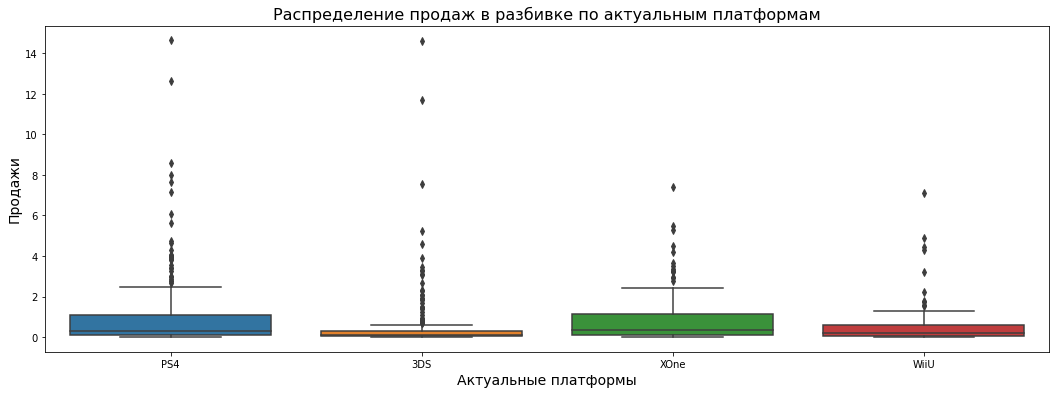

In [20]:
# построим диаграмму размаха по актуальным платформам
plt.figure(figsize = (18, 6))
sns.boxplot(
    data = most_actual_platform,
    x = 'platform',
    y = 'total_sales')

plt.xlabel('Актуальные платформы', fontsize = 14)
plt.ylabel('Продажи', fontsize = 14)
plt.title('Распределение продаж в разбивке по актуальным платформам', fontsize = 16)
plt.show()

На диаграмме размаха очень много выбрасов. Масштабируем диаграмму для поиска более детальной информации по каждой платформе.

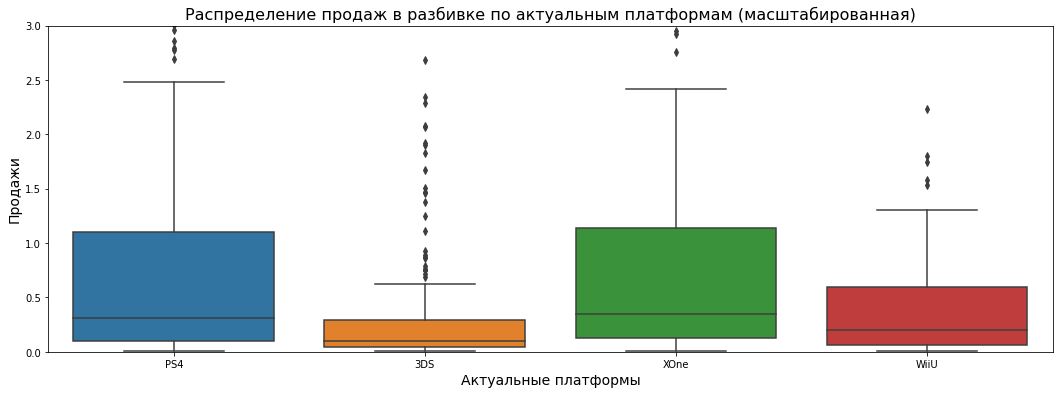

In [21]:
# построим диаграмму размаха по актуальным платформам (масштабированную)
plt.figure(figsize = (18, 6))
sns.boxplot(
    data = most_actual_platform,
    x = 'platform',
    y = 'total_sales')

plt.xlabel('Актуальные платформы', fontsize = 14)
plt.ylabel('Продажи', fontsize = 14)
plt.title('Распределение продаж в разбивке по актуальным платформам (масштабированная)', fontsize = 16)
plt.ylim(0, 3)
plt.show()

Из масштабированной диаграммы размаха видно, что медианное количество продаж у актуальных платформ PS4, 3DS, XOne и WiiU не превышает 500 тыс. проданных копий, при чём для всех без исключения платформ медиана находится ближе к первому квартилю. Межквартильный размах наиболее ярко выражен у платформ PS4 и XOne, который превысил 1 млн. проданных копий, а нормальное распределение находится в пределах 2.5 млн проданных копий.

## Влияние оценок пользователей и критиков на продажи

Построим диаграммы рассеяния по каждой актуальной платформе и посмотрим, есть ли зависимость между продажами и оценками критиков/пользователей.

------------------------------------------------------------------------------------------------------------------------------------------------


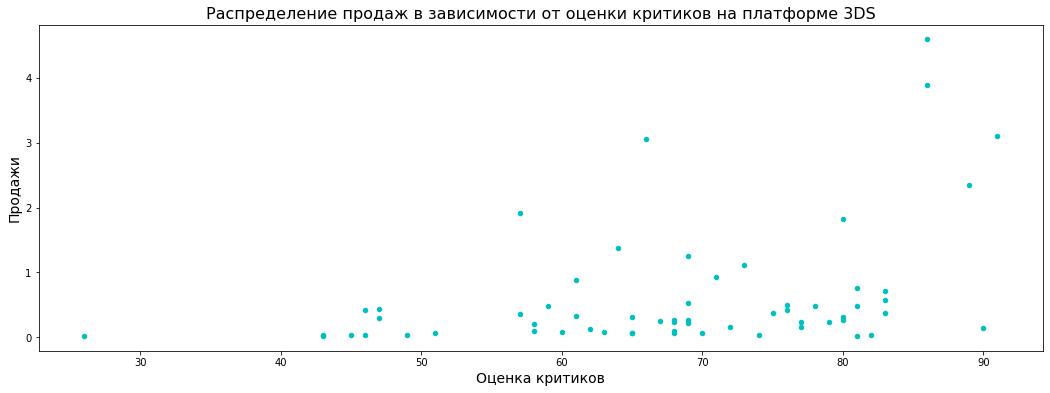

Корреляция между оценкой критиков и продажами: 0.38


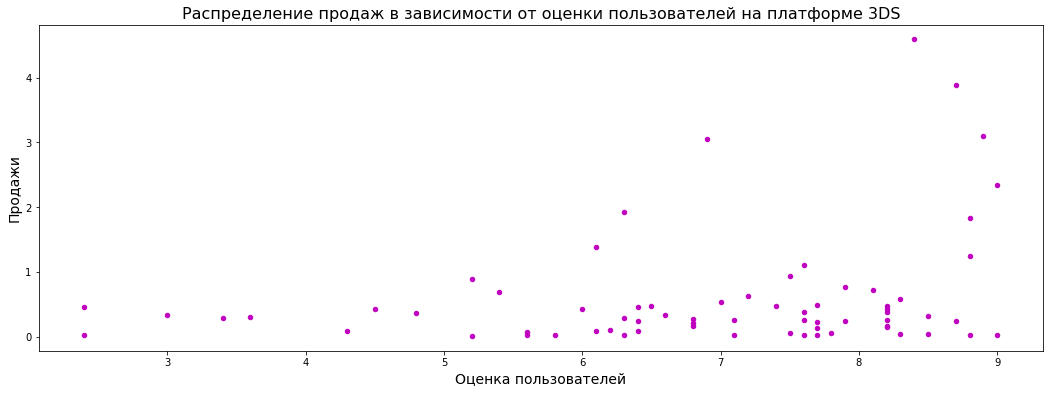

Корреляция между оценкой пользователей и продажами: 0.26
------------------------------------------------------------------------------------------------------------------------------------------------


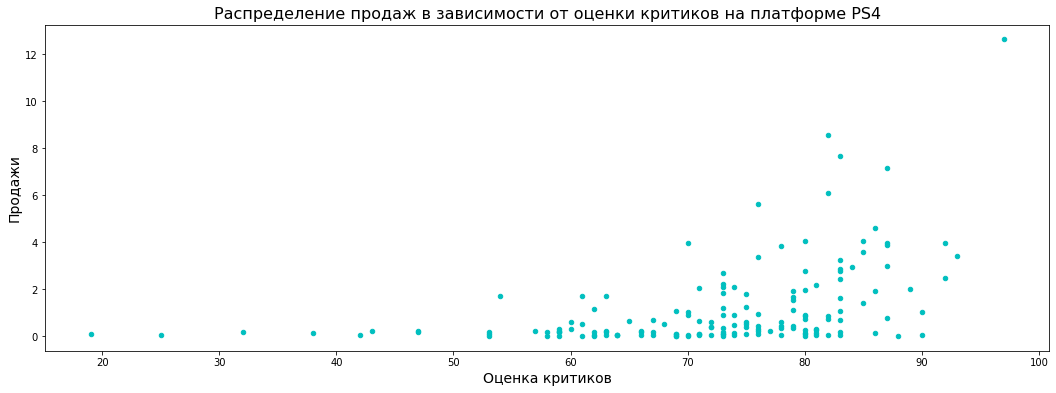

Корреляция между оценкой критиков и продажами: 0.43


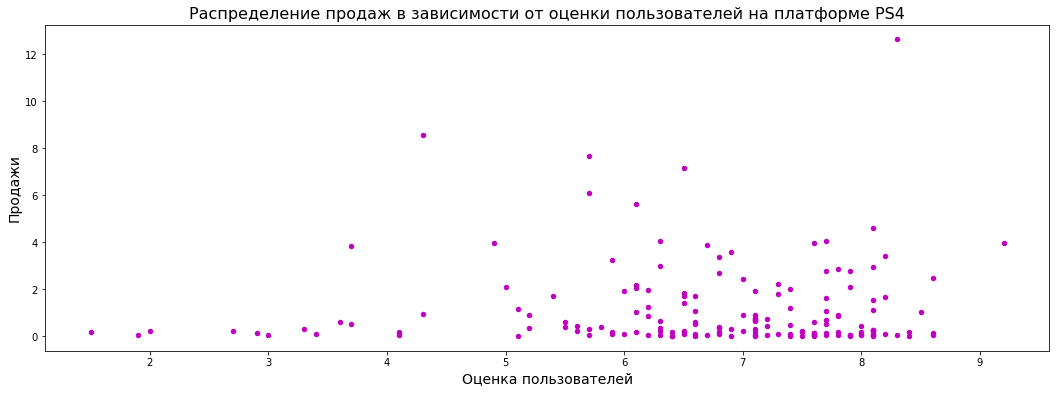

Корреляция между оценкой пользователей и продажами: 0.02
------------------------------------------------------------------------------------------------------------------------------------------------


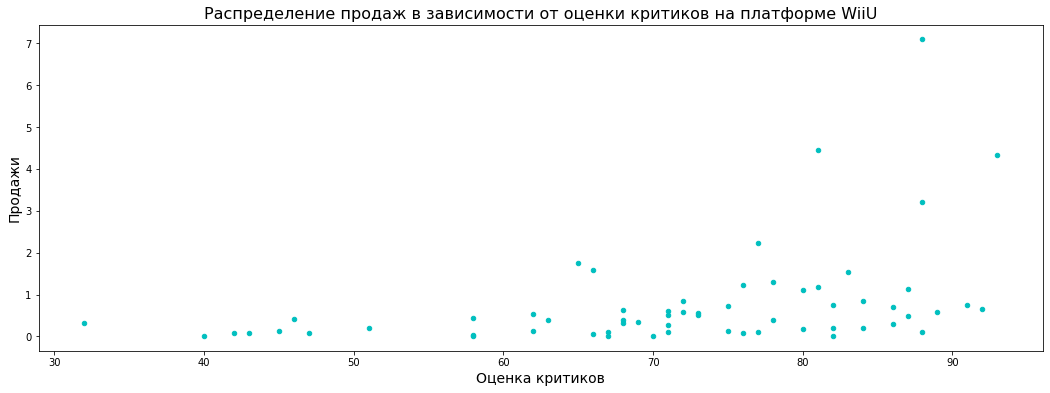

Корреляция между оценкой критиков и продажами: 0.38


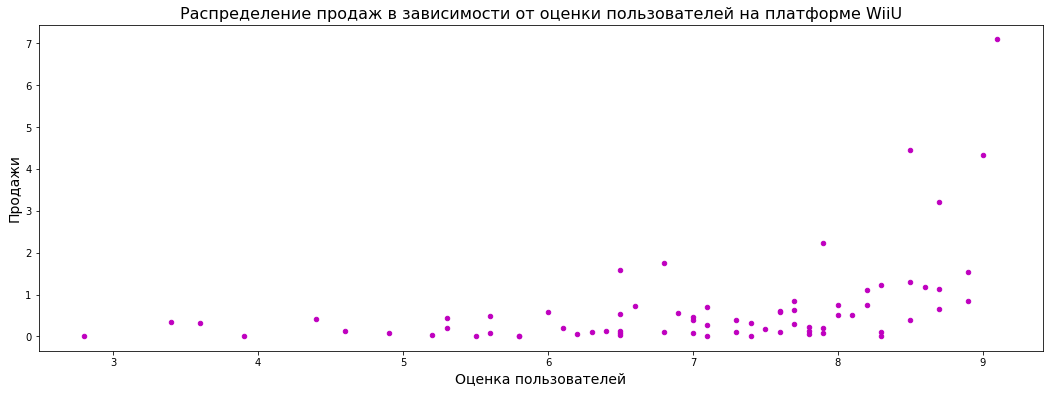

Корреляция между оценкой пользователей и продажами: 0.43
------------------------------------------------------------------------------------------------------------------------------------------------


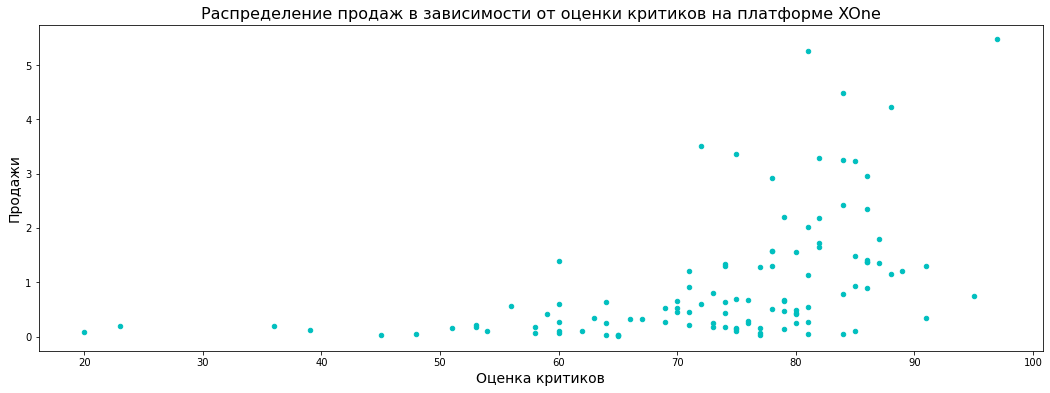

Корреляция между оценкой критиков и продажами: 0.46


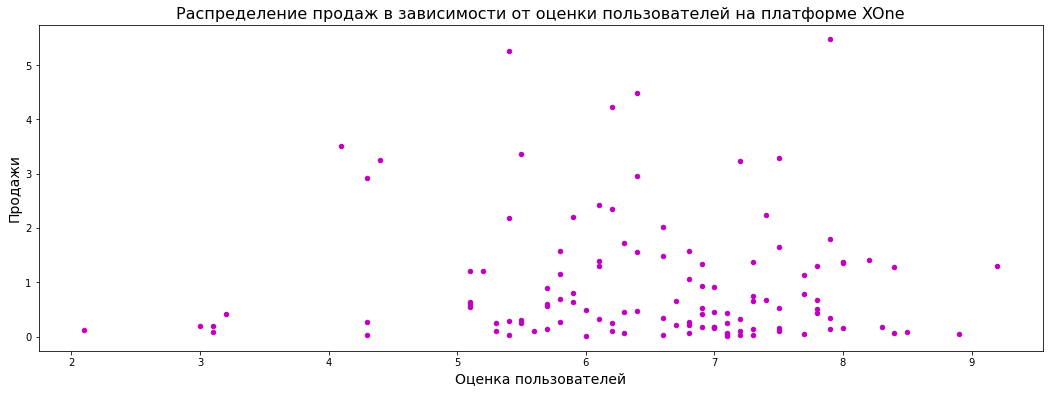

Корреляция между оценкой пользователей и продажами: -0.04


In [22]:
# создание цикла для поиска зависимостей
df, revenue = most_actual_platform, 'total_sales'

for platform, i in df.groupby('platform'):
    print('-' * 144)
    i[i['critic_score'] >= 0].plot(
        kind = 'scatter',
        x = 'critic_score', 
        y = revenue,
        color = 'c',
        figsize = (18, 6)
    )
    plt.title(f'Распределение продаж в зависимости от оценки критиков на платформе {platform}', fontsize = 16)
    plt.xlabel('Оценка критиков', fontsize = 14)
    plt.ylabel('Продажи', fontsize = 14) 
    plt.show() 
    print('Корреляция между оценкой критиков и продажами:', 
          (i[i['critic_score'] >= 0]['critic_score'].corr(i[revenue])).round(2))
    
    i[i['user_score'] >= 0].plot(
        kind = 'scatter',
        x = 'user_score', 
        y = revenue,
        color = 'm',
        figsize = (18, 6)
    )
    plt.title(f'Распределение продаж в зависимости от оценки пользователей на платформе {platform}', fontsize = 16)
    plt.xlabel('Оценка пользователей', fontsize = 14)
    plt.ylabel('Продажи', fontsize = 14) 
    plt.show()  
    print('Корреляция между оценкой пользователей и продажами:', 
          (i[i['user_score'] >= 0]['user_score'].corr(i[revenue])).round(2))

Явной зависимости от оценки критиков для платформ PS4 и XOne не видно, однако она всё-таки есть. На диаграмме можно увидеть как продажи начинают расти тем больше, чем выше оценка. Но так происходит не во всех представленных случаях. В одном случае можно заметить, что оценка критиков достигает 90 баллов, однако продажи по этой игре близки к нулю. В то же время, нет ни одного случая, где оценка критиков была бы низкой, но при этом, продажи по игре имели успех. Что касается зависимости продаж от оценок пользователей, то явной зависимости для платформ PS4 и XOne не обнаружено.

На платформах 3DS и WiiU наблюдается обоюдная корреляция оценок к продажам, однако выражена она неявно. По большому счету, сравнивая топовую платформу PS4 с аналогами, ничего необычного замечено не было. 

Возможно, на PS4 выходят самые лучшие и востребованные у потребителей игры, а остальным платформам приходится довольствоваться тем, что есть. Отсюда и возникла такая разница в объёмах продаж.

## Распределение продаж по жанрам

Для максимальной прибыльности необходимо найти стабильные жанры, на которые есть устойчивый спрос. Можно сделать уникальный сюжет, быстрый движок, красивую графику и вложить кучу денег в рекламу и продажи игры подпрыгнут. Но нам лучше выбирать игру из жанра, на которой есть постоянный спрос независимо от платформы или маркетинговых усилий производителей игр. Для этого сравним медианные продажи и построим столбчатую диаграмму и диаграмму размаха.

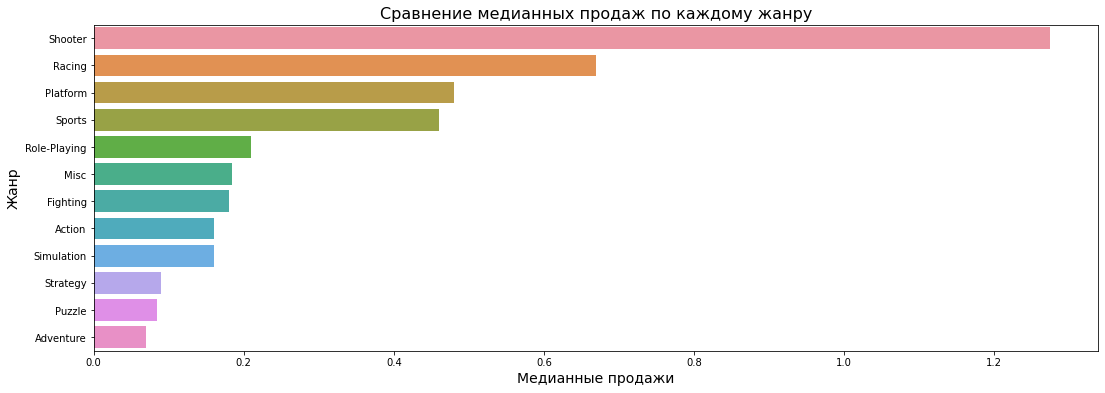

In [23]:
# группировка медианных продаж по жанрам
genre_per_sales = (
    most_actual_platform.groupby('genre', as_index = False)['total_sales'].agg('median')\
    .sort_values('total_sales', ascending = False)
)    

# построение столбчатой диаграммы
plt.figure(figsize = (18, 6))
sns.barplot(
    data = genre_per_sales,
    x = 'total_sales',
    y = 'genre')
plt.xlabel('Медианные продажи', fontsize = 14)
plt.ylabel('Жанр', fontsize = 14)
plt.title('Сравнение медианных продаж по каждому жанру', fontsize = 16);

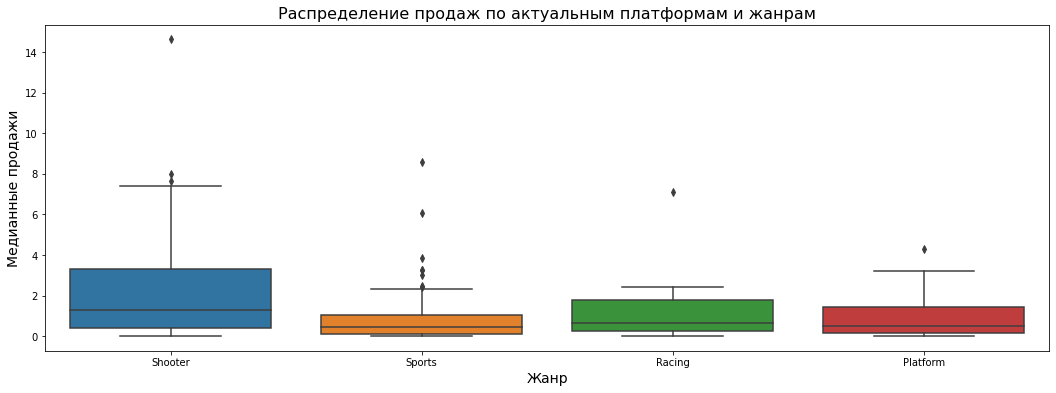

In [24]:
genres = ['Shooter', 'Racing', 'Platform', 'Sports']
actual_genre = most_actual_platform.query('@genres in genre')

# построение диаграммы размаха по актуальным платформам и жанрам
plt.figure(figsize = (18, 6))
sns.boxplot(
    data = actual_genre,
    x = 'genre',
    y = 'total_sales')

plt.xlabel('Жанр', fontsize = 14)
plt.ylabel('Медианные продажи', fontsize = 14)
plt.title('Распределение продаж по актуальным платформам и жанрам', fontsize = 16);

## Промежуточный вывод
Бурное развитие игровой индустрии началось с 1995 года, достигнув пика в 2009-2010 годах. Средний жизненный цикл одной платформы составляет 10 лет. В качестве актуального периода был взят диапазон в 3 года: с 2013 по 2015 год включительно. Такой период поможет понять, какие предпочтения у клиентов в последнее время, позволит спрогнозировать продажи на будущий период и правильно спланировать рекламные кампании. 

За последние 3 года можно увидеть, как набирают популярность платформы PS4 и XOne. Их выручка и количество выпущенных игр растут, а значит, есть смысла активно продвигать эти платформы. Менее популярны платформы 3DS и WiiU, имеющие значительную долю на рынке игр, однако их продажи в последние годы падают.

Выявлена умеренная корреляция между продажами и оценками критиков по топовым платформам PS4 и XOne. У платформ 3DS и WiiU корреляция между оценками критиков/пользователей и продажами выражена слабо.

Наиболее продаваемым жанром является Shooter. Также неплохо показали себя жанры Racing, Platform и Sports, медианные продажи которых стабильно высокие.

## Портрет пользователя каждого региона

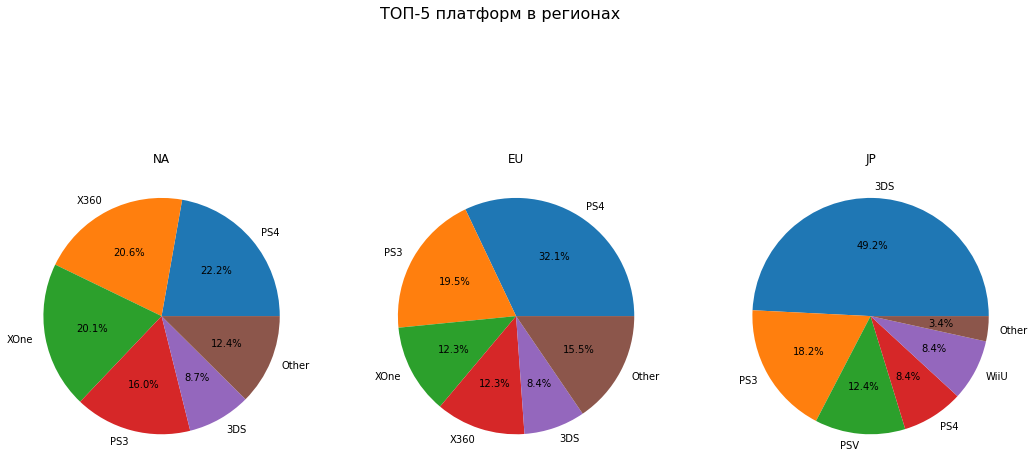

In [25]:
#задаем список регионов
countries = new_data.columns[4:7]

#создадим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize = (18, 9))
fig.suptitle('ТОП-5 платформ в регионах', fontsize = 16)
for i in range(3):
    #выберем 5 самых продающих платформ
    df_i = (new_data.groupby('platform', as_index = False)[countries[i]].sum()
            .sort_values(countries[i], ascending = False, ignore_index = True)
            .head()
           )
    #занесём все остальные продажи в Other
    df_i = df_i.append({'platform':'Other', countries[i]:new_data[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index = True)
    axs[i].pie(df_i[countries[i]], labels = df_i['platform'], autopct = '%1.1f%%')
    
    #зададим название региона
    axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()    

В основном пользователи из Сев.Америки играют через PS4, XOne и X360 общая доля которых составила 63%. Доля топ-5 платформ от общего числа составила 88%. Поведение жителей Европы немного отлично от житилей Сев.Америки, так как самой популярной платформой там считается PS4, которая занимает треть всего рынка. Следом за ней по популярности идет PS3 с долей 19.5%. XOne и X360 распределились равными долями 12.3%. Всего на топ-5 приходится 85% от всех используемых платформ. В Японии ситуация сильно отличается от двух других частей света. Основную долю рынка в ней составляет платформа 3DS, на которую приходится 49,2% всех продаж. При этом на долю топ-5 платформ приходится более 96% от всех продаж.

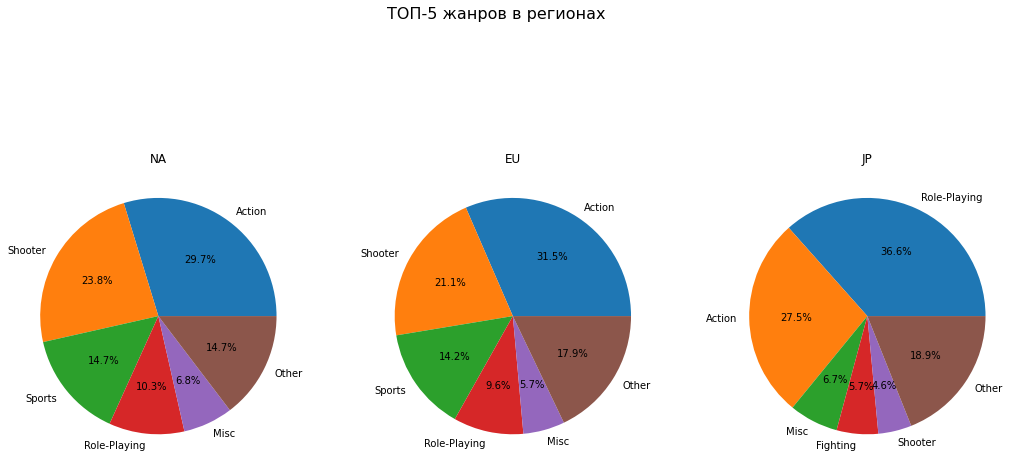

In [26]:
#создадим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize = (18,9))
fig.suptitle('ТОП-5 жанров в регионах', fontsize = 16)
for i in range(3):
    #выберем 5 самых продающихся жанров
    df2_i = (new_data.groupby('genre', as_index = False)[countries[i]].sum()
            .sort_values(countries[i], ascending = False, ignore_index = True)
            .head()
            )
    #занесём все остальные продажи в Other
    df2_i = df2_i.append({'genre':'Other', countries[i]:new_data[countries[i]].sum() - df2_i[countries[i]].sum()}, ignore_index = True)
    axs[i].pie(df2_i[countries[i]], labels = df2_i['genre'], autopct = '%1.1f%%')
    
    #зададим название региона
    axs[i].set_title(df2_i.columns[1].split('_')[0].upper())
plt.show()    

Жители Северной Америки больше предпочитают играть в экшен, шутеры, спортивные и ролевые игры. Доля топ-5 жанров от общего числа составила 85%. Ситуация у жителей Европы схожа с жителями Сев.Америки, однако больше всего люди предпочитают экшен игры, доля которых составила 31,5%. Всего на долю топ-5 пришлось 82,1% продаж. Любители игр из Японии больше предпочитают ролевые и экшен игры, обоюдная доля которых составила 64%. Доля топ-5 от общего количества проданных игр составила 81%. Также жители Японии любят игры с файтингом, что также является их отличительной чертой.

Посмотрим, как влияет рейтинг ESRB на продажи в каждом регионе и в целом. 

In [27]:
# добавим к аббревиатуре рейтинга возрастное ограничение
new_data.loc[new_data.rating == 'M', 'rating'] = 'Для взрослых'
new_data.loc[new_data.rating == 'E', 'rating'] = 'Для всех'
new_data.loc[new_data.rating == 'T', 'rating'] = 'Для подростков'
new_data.loc[new_data.rating == 'E10+', 'rating'] = 'Для всех старше 10 лет'

# построим сводную таблицу для выявления зависимости продаж от рейтинга ESRB
rating_pivot = (
    new_data.pivot_table(
        index = 'rating', 
        values = ['na_sales', 'eu_sales', 'jp_sales'], 
        aggfunc = 'sum', 
        margins = True, 
        margins_name = 'total_sales')
)   
rating_pivot['total_sales'] = rating_pivot['na_sales'] + rating_pivot['eu_sales'] + rating_pivot['jp_sales']
rating_pivot = (rating_pivot
                .sort_values('total_sales', ascending = True)
                .reindex(columns=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'])
)                
rating_pivot

,na_sales,eu_sales,jp_sales,total_sales
rating,,,,
Для подростков,40.84,32.16,18.32,91.32
Для всех старше 10 лет,50.43,38.88,5.44,94.75
Для всех,71.08,69.75,14.07,154.90
Empty,80.89,71.44,70.73,223.06
Для взрослых,149.54,128.78,12.91,291.23
total_sales,392.78,341.01,121.47,855.26


Пользователи Северной Америки в основном предпочитают игры для взрослых и игры для всех возрастов. Так же присутствуют игры без рейтинга, продажи которых составили 20.6% (80.9 млн копий) от общего числа проданных игр в размере 393 млн копий. Похожая ситуация наблюдается у любителей игр в Европе, общие продажи которых оказались чуть ниже - 341 млн копий. В Японии структура иная: основная доля продаж - 58% - приходится на игры без маркировки и 15% на игры для подростков. Общие продажи в Японии составили 121.5 млн копий, что в среднем почти в 3 раза меньше чем у Европы и у Северной Америки. Отсутствие рейтинга, вероятно, связано с тем, что рейтинг ESRB предназначен для маркировки игр, выпущенных из США и Канады, поэтому логично, что для Европы и Японии его нет, так как у них присутствуют другие рейтинги: PEGI для стран Европы и CERO для Японии.

## А/Б-тестирование

### Проверка на нормальность распределения для определения статистического критерия

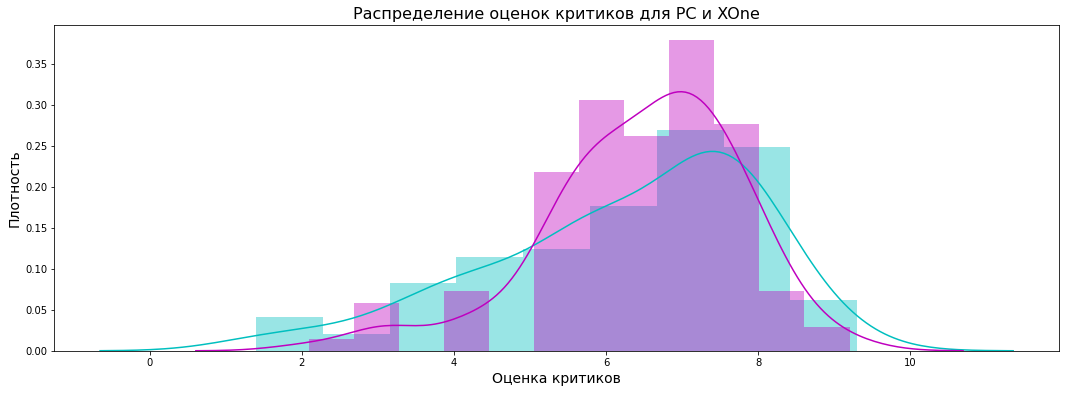

In [28]:
pc = new_data.query('platform == "PC" and user_score >= 0')  # выборка по РС
xone = new_data.query('platform == "XOne" and user_score >= 0')  # выборка по XOne

plt.figure(figsize = (18, 6))
sns.distplot(pc['user_score'], color = 'c')
sns.distplot(xone['user_score'], color = 'm')
plt.xlabel('Оценка критиков', fontsize = 14)
plt.ylabel('Плотность', fontsize = 14)
plt.title('Распределение оценок критиков для PC и XOne', fontsize = 16);

In [29]:
# тест Шапиро-Уилка на нормальность распределения
print('PC -', st.shapiro(pc['user_score']))
print('XOne -', st.shapiro(xone['user_score']))

PC - ShapiroResult(statistic=0.9425097107887268, pvalue=0.00013064080849289894)
XOne - ShapiroResult(statistic=0.9568126201629639, pvalue=0.0008991601062007248)


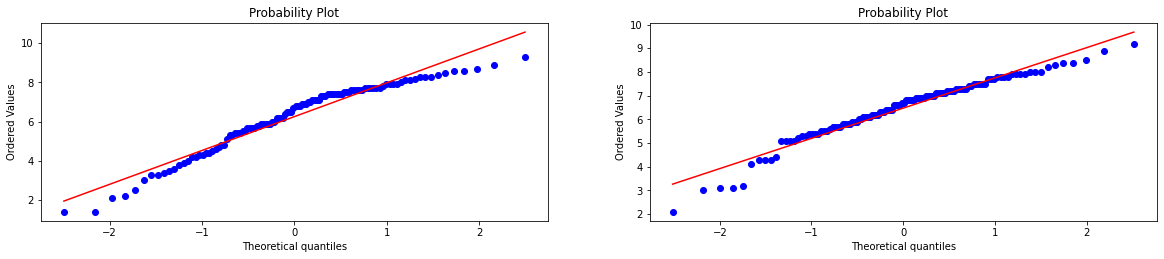

In [30]:
# QQ-plot
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
st.probplot(pc['user_score'], dist = "norm", plot = plt)
plt.subplot(2,2,2)
st.probplot(xone['user_score'], dist = "norm", plot = plt);

По результату проверки, распределения оказались неравномерными, поэтому для корректного А/Б-тестирования воспользуемся непараметрическим критерием Манна-Уитни.

## Сравнение средних пользовательских рейтингов платформ XOne и PC

Введем основную и альтернативные гипотезы:

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги платформ XOne и PC одинаковыe}\\
   H_1 :\text{Средние пользовательские рейтинги платформ XOne и PC отличаются}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Посчитаем p-value, используя mannwhitneyu из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [31]:
#присвоим уровень статистической значимости
alpha = 0.05

#проверим гипотезу о равенстве средних двух независимых совокупностей
first_hypo = st.mannwhitneyu(pc['user_score'], xone['user_score'], alternative = 'two-sided')
print('p-value:', round(first_hypo.pvalue, 3))

#сравним фактическое p-значение с заданным уровнем статистической значимости
if first_hypo.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.825
Не получилось отвергнуть нулевую гипотезу


In [32]:
# проверим результат расчета 
print('Средний пользовательский рейтинг XOne:',
      round(xone['user_score'].mean(), 3))
print('Средний пользовательский рейтинг PC:',
      round(pc['user_score'].mean(), 3))

Средний пользовательский рейтинг XOne: 6.478
Средний пользовательский рейтинг PC: 6.258


Нулевая гипотеза по результату не отвергается, а значит: средние пользовательские рейтинги платформ XOne и PC одинаковые.  

## Сравнение пользовательских рейтингов для жанров Action и Sports

Так как тестируем одну и ту же величину - пользовательский рейтинг - проверку на нормальность дважды проводить не имеет смысла. Поскольку распределение ненормальное, гипотезы также будем проверять непараметрическим тестом Манна-Уитни.

Введем основную и альтернативные гипотезы:

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги жанров Action и Sports одинаковыe}\\
   H_1 :\text{Средние пользовательские рейтинги жанров Action и Sports отличаются}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Посчитаем p-value, используя mannwhitneyu из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [33]:
action = new_data.query('genre == "Action" and user_score >= 0')  # выборка по Action
sports = new_data.query('genre == "Sports" and user_score >= 0')  # выборка по Sports

#проверим гипотезу о равенстве средних двух независимых совокупностей
second_hypo = st.mannwhitneyu(action['user_score'], sports['user_score'], alternative = 'two-sided')
print('p-value:', round(second_hypo.pvalue, 3))

#сравним фактическое p-значение с заданным уровнем статистической значимости
if second_hypo.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.0
Отвергаем нулевую гипотезу


In [34]:
# проверим результат расчета 
print('Средний пользовательский рейтинг Action:',
      round(action['user_score'].mean(), 3))
print('Средний пользовательский рейтинг Sports:',
      round(sports['user_score'].mean(), 3))

Средний пользовательский рейтинг Action: 6.893
Средний пользовательский рейтинг Sports: 5.18


Нулевая гипотеза по результату теста отвергается и принимается альтернативная. Это означает, что средние пользовательские рейтинги в жанрах Action и Sports - различны. В целом, статистические тесты и выдвижение гипотез здесь не совсем уместно, так как судя по данным, мы имеем дело не с выборкой, а с генеральной совокупностью и можем сравнивать истинные средние напрямую.

## Общий вывод
В данном проекте была представлена ситуация на рынке игровых услуг с 1980 года по 2016 год включительно. Основная задача исследования заключалась в выявлении закономерностей успешных игр, на основании которых можно эффективно спланировать рекламную кампанию на будущий 2017 год. В целом ситуация в игровой индустрии на данный момент испытывает не самые лучшие времена. Пик продаж пришелся на 2009-2010 года, после чего динамика пошла на спад. В качестве актуальных данных, на которых построен расчет и анализ, был взят период за последние 3 полных года (с 2013 по 2015 год включительно). 

За последние 3 года можно увидеть, как набирают популярность платформы PS4 и XOne. Их выручка и количество выпущенных игр растут, а значит, есть смысл активно продвигать эти платформы. Менее популярны платформы 3DS и WiiU, имеющие значительную долю на рынке игр, однако их продажи в последние годы падают.

Явной зависимости от оценки критиков для платформ PS4 и XOne не видно, однако она всё-таки есть. Что касается зависимости продаж от оценок пользователей, то явной зависимости для платформ PS4 и XOne не обнаружено. На платформах 3DS и WiiU наблюдается обоюдная корреляция оценок к продажам, однако выражена она неявно.

Наиболее продаваемым жанром является Shooter. Также неплохо показали себя жанры Racing, Platform и Sports, медианные продажи которых за последние 3 года стабильно высокие.

Наибольшей популярностью в Северной Америке пользуются платформы PS4, X360 и XOne, для Европы - PS4, для Японии - 3DS.
Самыми продаваемыми жанрами для Северной Америки и Европы являются: Shooter, Action и Sports; а для Японии - Role-Playing и Action.
Пользователи Северной Америки в основном предпочитают игры для взрослых и игры для всех возрастов. В Японии структура несколько иная: основная доля продаж приходится на игры без маркировки и на игры для подростков.

Также были проверены 2 гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - полученные результаты говорят о том, что средние пользовательсике рейтинги не различаются статистически значимо по данным платформам.
- Средние пользовательские рейтинги жанров Action и Sports разные - полученные результаты говорят о том, что средние пользовательские рейтинги жанров Action и Sports различаются статистически значимо.